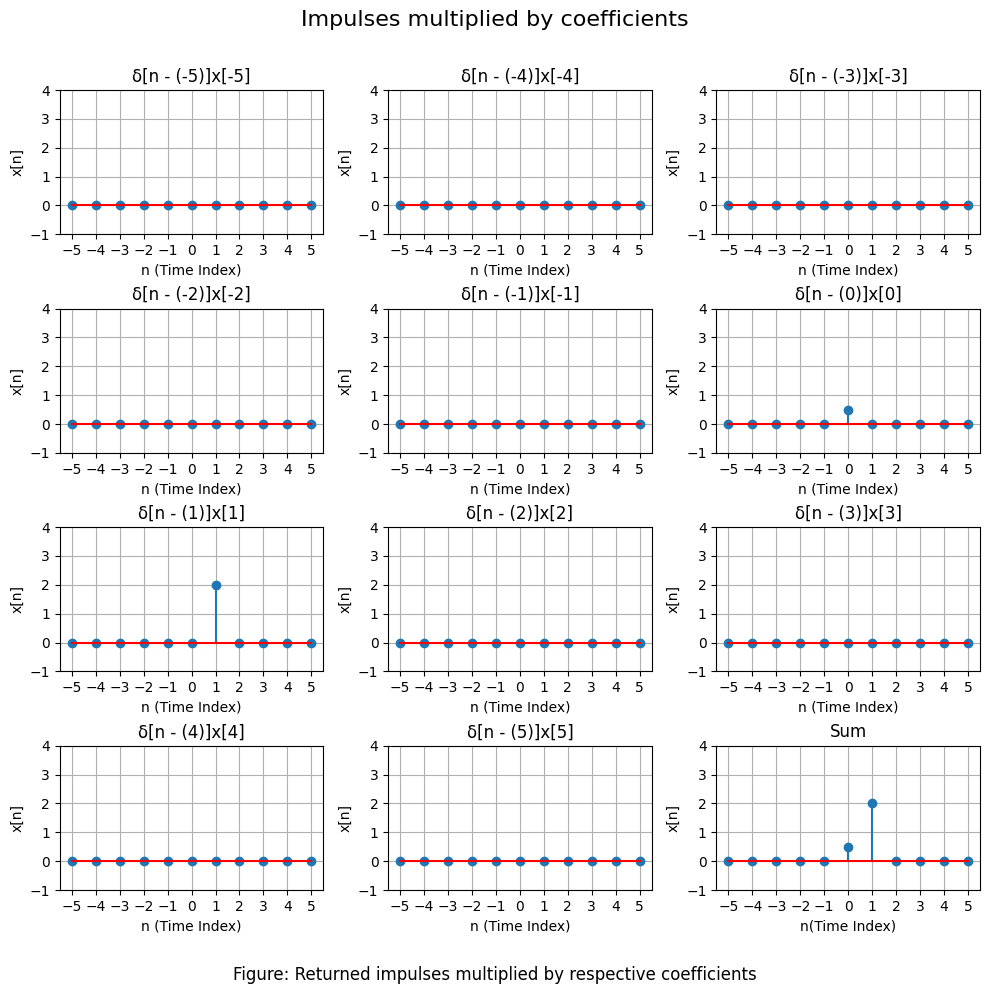

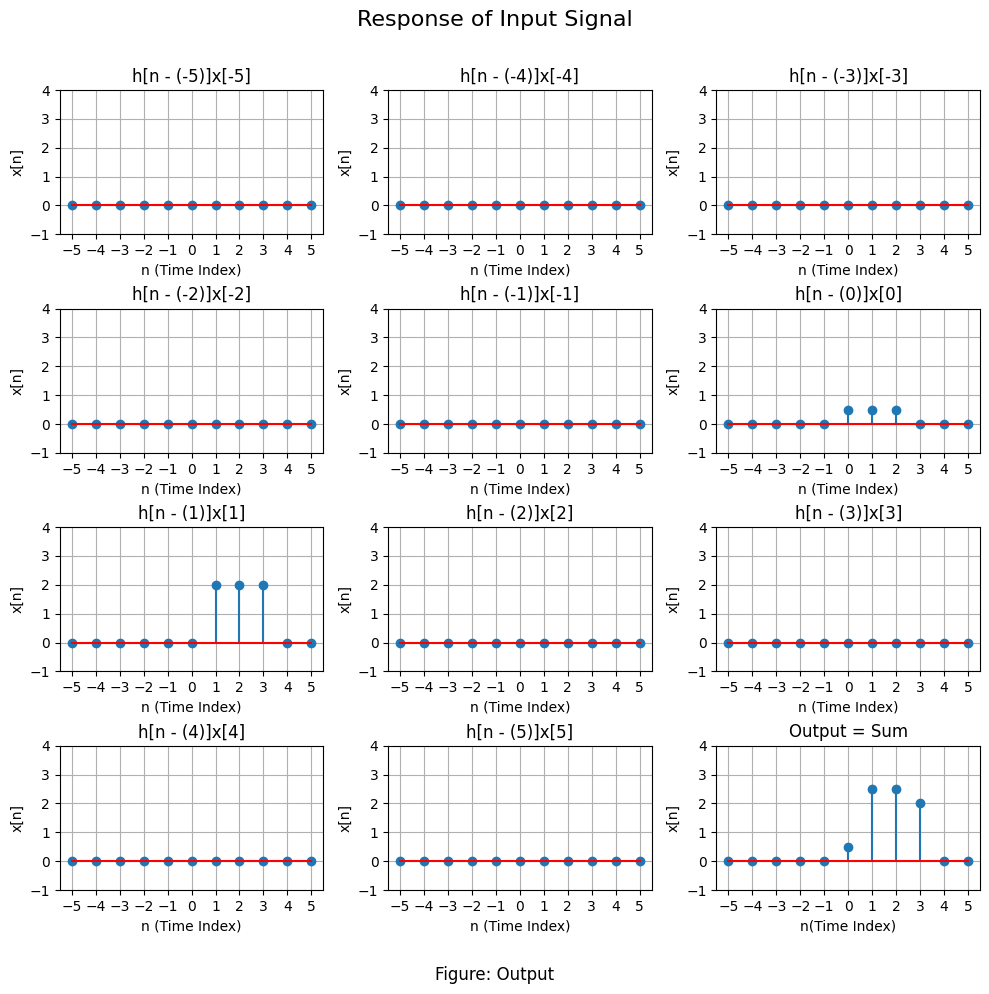

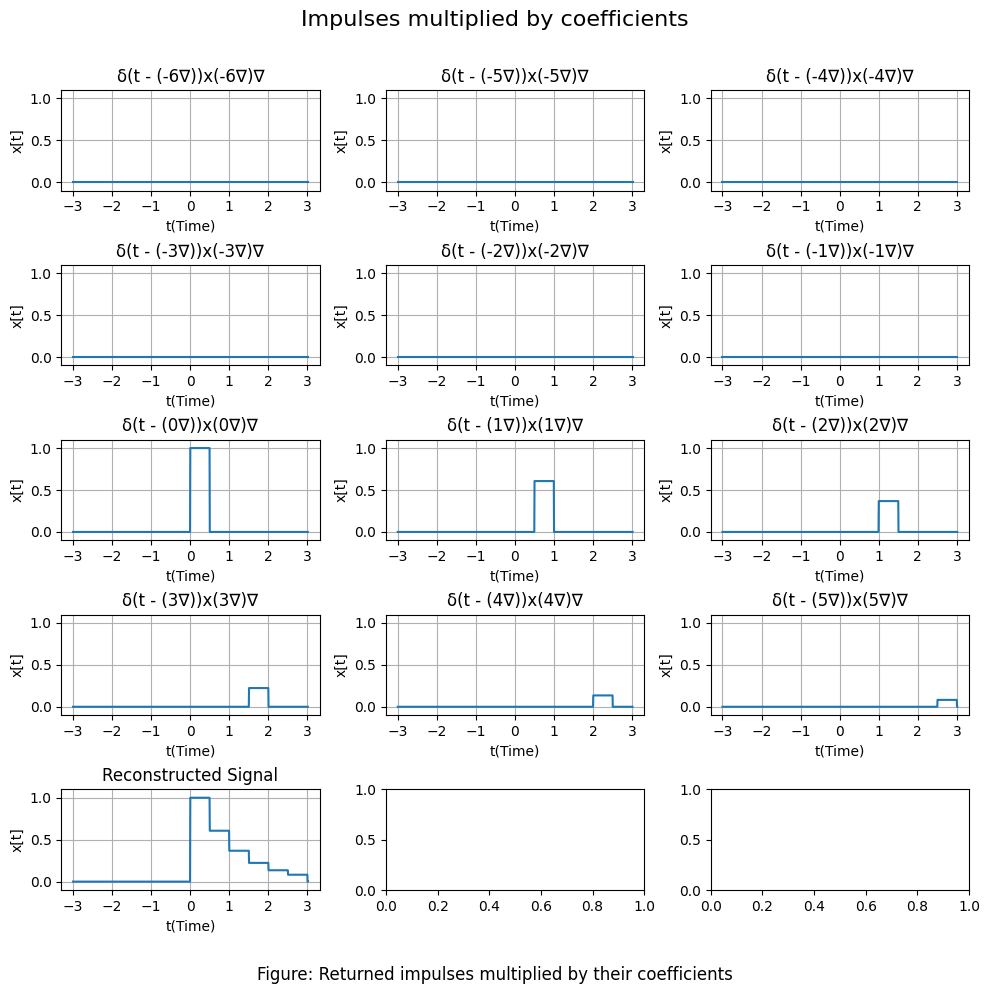

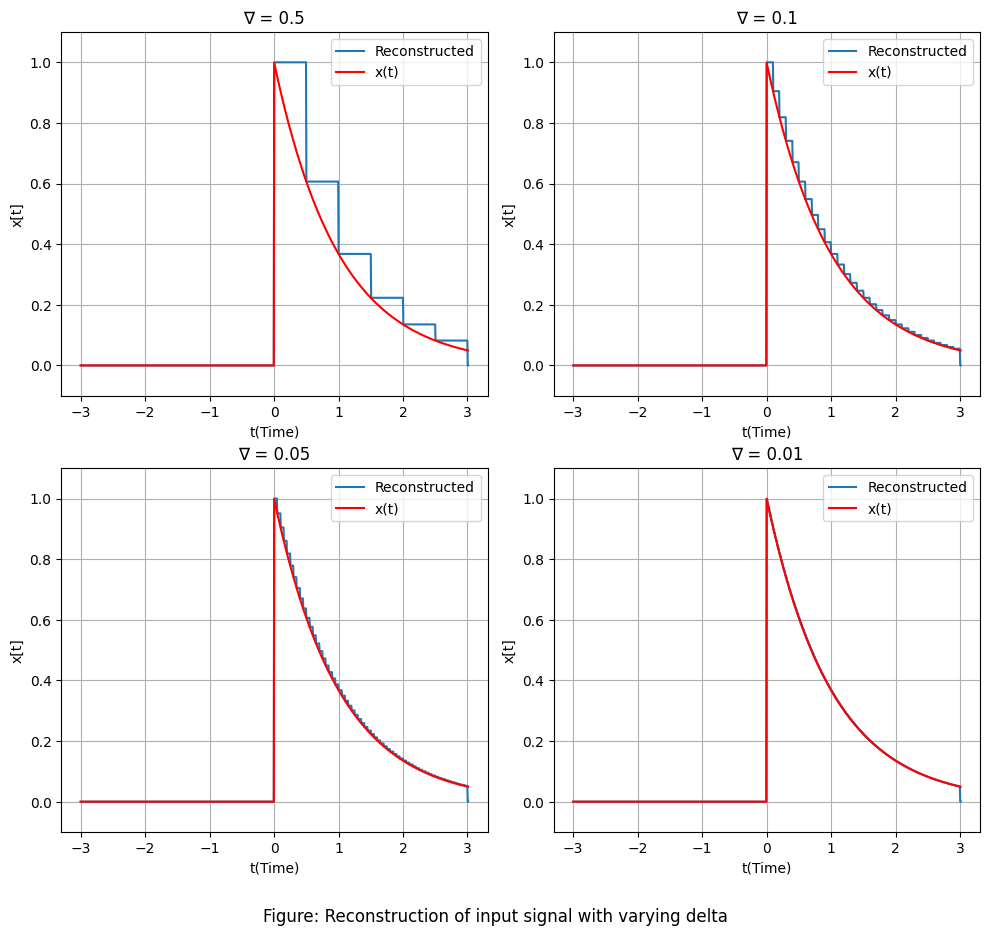

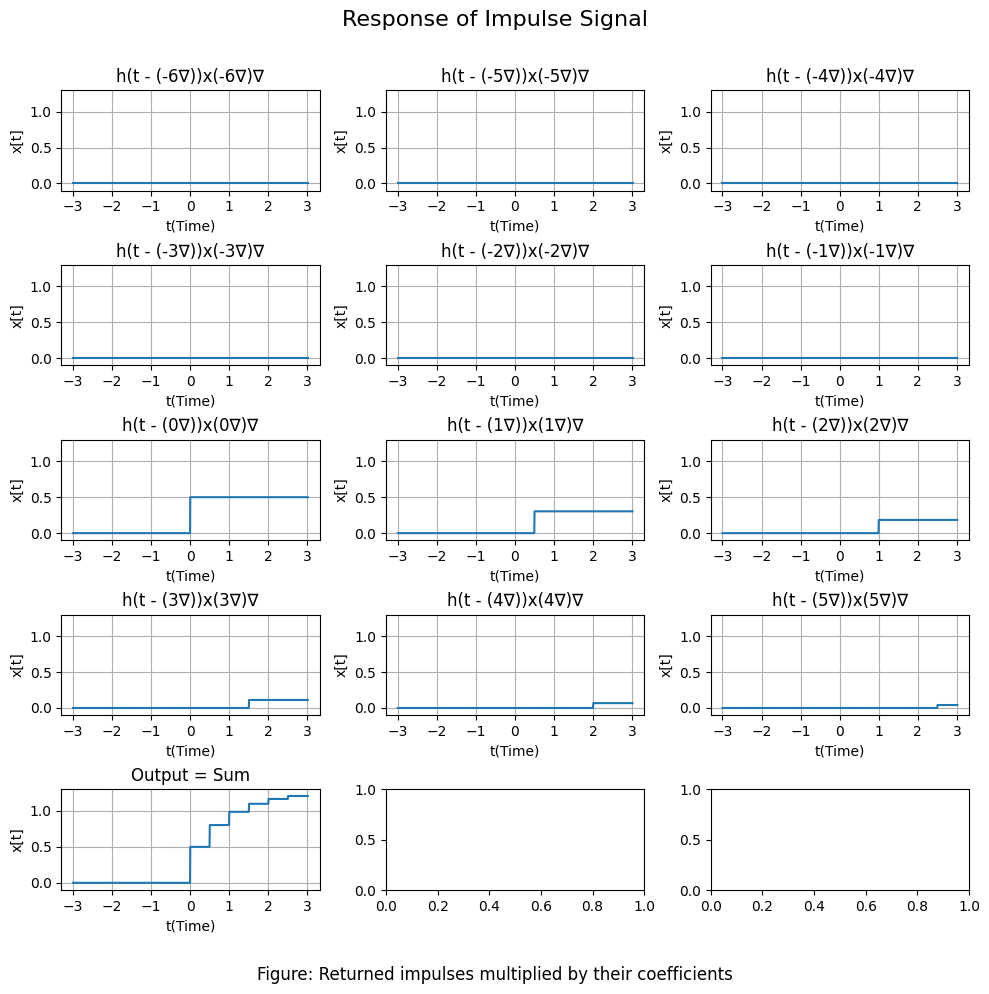

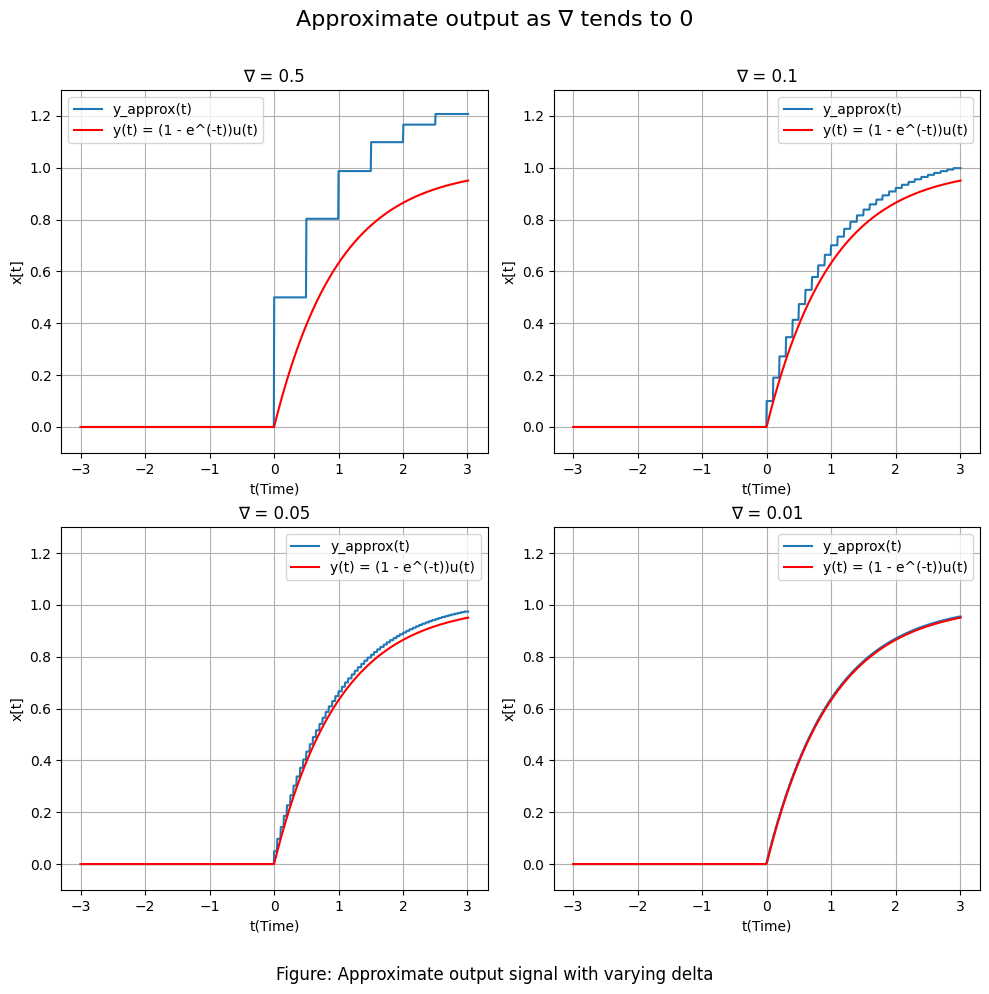

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


class DiscreteSignal:
    def __init__(self, values: np.ndarray, INF: int):
        self.values = values
        self.INF = INF

    def set_value_at_time(self, time: int, value):
        if time >= 0 and time <= 2 * self.INF:
            self.values[time] = value

    def shift_signal(self, shift: int):
        new_values = self.values
        if shift > 0:
            new_values = np.concatenate(
                (np.zeros(shift), self.values[: len(self.values) - shift])
            )

        else:
            new_values = np.concatenate((self.values[-shift:], np.zeros(-shift)))
        return DiscreteSignal(new_values, self.INF)

    def add(self, other: "DiscreteSignal"):
        new_values = self.values + other.values
        return DiscreteSignal(new_values, self.INF)

    def multiply(self, other: "DiscreteSignal"):
        new_values = self.values * other.values
        return DiscreteSignal(new_values, self.INF)

    def multiply_constant_factor(self, scaler):
        new_values = self.values * scaler
        return DiscreteSignal(new_values, self.INF)

    def plot_signal(self):
        plt.figure(figsize=(8, 3))
        plt.xticks(np.arange(-self.INF, self.INF + 1, 1))
        y_range = (-1, max(np.max(self.values), 3) + 1)
        plt.ylim(*y_range)
        plt.stem(np.arange(-self.INF, self.INF + 1, 1), self.values)
        plt.title("Discrete Signal")
        plt.xlabel("n (Time Index)")
        plt.ylabel("x[n]")
        plt.grid(True)
        plt.show()

    def plot(
        self,
        DiscreteSignals: list["DiscreteSignal"],
        title,
        supTitle,
        subplotTitles,
        rows,
        columns,
        saveTo,
    ):
        summed_signal = DiscreteSignals[len(DiscreteSignals) - 1]
        DiscreteSignals = DiscreteSignals[: len(DiscreteSignals) - 1]

        # Create a figure with multiple subplots (4 rows, 3 columns)
        fig, axs = plt.subplots(rows, columns, figsize=(10, 10))
        y_range = (-1, max(np.max(self.values), 3) + 1)

        # Title for the entire figure
        fig.suptitle(supTitle, fontsize=16)

        # Plot the individual impulses δ[n-k] * x[k]
        row, col = 0, 0
        for DiscreteSignal, subplotTitle in zip(DiscreteSignals, subplotTitles):
            axs[row, col].stem(
                np.arange(-self.INF, self.INF + 1, 1),
                DiscreteSignal.values,
                basefmt="r-",
            )
            axs[row, col].set_xticks(np.arange(-self.INF, self.INF + 1, 1))
            axs[row, col].set_ylim(*y_range)
            axs[row, col].set_title(subplotTitle)
            axs[row, col].set_xlabel("n (Time Index)")
            axs[row, col].set_ylabel("x[n]")
            axs[row, col].grid(True)
            col += 1
            if col == columns:
                col = 0
                row += 1

        # Plot the sum of all impulse responses in the last subplot
        axs[row, col].stem(
            np.arange(-self.INF, self.INF + 1, 1), summed_signal.values, basefmt="r-"
        )
        axs[row, col].set_xticks(np.arange(-self.INF, self.INF + 1, 1))
        axs[row, col].set_ylim(*y_range)
        axs[row, col].set_title(subplotTitles[len(subplotTitles) - 1])
        axs[row, col].set_xlabel("n(Time Index)")
        axs[row, col].set_ylabel("x[n]")
        axs[row, col].grid(True)

        # Adjust layout to prevent overlapping of plots
        plt.tight_layout()
        plt.subplots_adjust(top=0.9, bottom=0.1)

        # Add a caption below the figure
        fig.text(
            0.5,
            0.01,
            title,
            ha="center",
            fontsize=12,
        )

        # Save figure
        plt.savefig(saveTo)

        # Display the plot
        # plt.show()


class ContinuousSignal:
    def __init__(self, func, INF: int):
        self.func = func
        self.INF = INF

    def shift(self, shift: int):
        return ContinuousSignal(lambda t: self.func(t - shift), self.INF)

    def add(self, other: "ContinuousSignal"):
        return ContinuousSignal(lambda t: self.func(t) + other.func(t), self.INF)

    def multiply(self, other: "ContinuousSignal"):
        return ContinuousSignal(lambda t: self.func(t) * other.func(t), self.INF)

    def multiply_constant_factor(self, scaler):
        return ContinuousSignal(lambda t: self.func(t) * scaler, self.INF)

    def plot_signal(self, minheight=0, maxheight=1, y_tick_spacing=0.5, color="blue"):
        t = np.linspace(-self.INF, self.INF + 0.01, 1000)
        plt.figure(figsize=(8, 3))
        plt.xticks(np.arange(-self.INF, self.INF + 1, 1))
        plt.plot(t, self.func(t), color=color)
        plt.ylim([minheight - 0.1, maxheight + 0.3])
        plt.yticks(np.arange(0, maxheight + y_tick_spacing, y_tick_spacing))
        plt.title("Continuous Signal")
        plt.xlabel("t(Time)")
        plt.ylabel("x(t)")
        plt.grid(True)
        plt.show()

    def plot(
        self,
        continuousSignals: list["ContinuousSignal"],
        title,
        supTitle,
        subplotTitles,
        rows,
        columns,
        saveTo,
        minheight=0,
        maxheight=1,
        y_tick_spacing=0.5,
        samePlot=False,
        label1="",
        label2="",
    ):
        t = np.linspace(-self.INF, self.INF + 0.01, 1000)
        reconstructed_signal = continuousSignals[len(continuousSignals) - 1]
        continuousSignals = continuousSignals[: len(continuousSignals) - 1]

        # Create a figure with multiple subplots (4 rows, 3 columns)
        fig, axs = plt.subplots(rows, columns, figsize=(10, 10))

        # Title for the entire figure
        fig.suptitle(supTitle, fontsize=16)

        # Plot the individual impulses δ/h[t-k▽] * x[t] * ▽
        row, col = 0, 0
        for continuousSignal, subplotTitle in zip(continuousSignals, subplotTitles):
            axs[row, col].set_xticks(np.arange(-self.INF, self.INF + 1, 1))
            axs[row, col].set_yticks(
                np.arange(0, maxheight + y_tick_spacing, y_tick_spacing)
            )
            if samePlot:
                axs[row, col].plot(t, continuousSignal.func(t), label=label1)
                axs[row, col].plot(t, self.func(t), color="red", label=label2)
            else:
                axs[row, col].plot(t, continuousSignal.func(t))
            axs[row, col].set_ylim([minheight, maxheight])
            axs[row, col].set_title(subplotTitle)
            axs[row, col].set_xlabel("t(Time)")
            axs[row, col].set_ylabel("x[t]")
            if samePlot:
                axs[row, col].legend()
            axs[row, col].grid(True)
            col += 1
            if col == columns:
                col = 0
                row += 1

        # Plot the sum of all impulse responses in the last subplot
        axs[row, col].set_xticks(np.arange(-self.INF, self.INF + 1, 1))
        axs[row, col].set_yticks(
            np.arange(0, maxheight + y_tick_spacing, y_tick_spacing)
        )
        if samePlot:
            axs[row, col].plot(t, reconstructed_signal.func(t), label=label1)
            axs[row, col].plot(t, self.func(t), color="red", label=label2)
        else:
            axs[row, col].plot(t, reconstructed_signal.func(t))
        axs[row, col].set_ylim([minheight, maxheight])
        axs[row, col].set_title(subplotTitles[len(subplotTitles) - 1])
        axs[row, col].set_xlabel("t(Time)")
        axs[row, col].set_ylabel("x[t]")
        if samePlot:
            axs[row, col].legend()
        axs[row, col].grid(True)

        # Adjust layout to prevent overlapping of plots
        plt.tight_layout()
        plt.subplots_adjust(top=0.9, bottom=0.1)

        # Add a caption below the figure
        fig.text(
            0.5,
            0.01,
            title,
            ha="center",
            fontsize=12,
        )

        # Save figure
        plt.savefig(saveTo)

        # Display the plot
        # plt.show()


class LTI_Discrete:

    def __init__(self, impulse_response: "DiscreteSignal"):
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal: "DiscreteSignal"):
        INF = input_signal.INF
        unit_impulses = []
        coefficients = []
        for i in range(-INF, INF + 1):
            coefficient = input_signal.values[INF + i]
            unit_impulse = DiscreteSignal(np.zeros(2 * INF + 1), INF)
            unit_impulse.set_value_at_time(INF, 1)
            unit_impulses.append(unit_impulse.shift_signal(i))
            coefficients.append(coefficient)

        return unit_impulses, coefficients

    def output(self, input_signal: "DiscreteSignal"):
        INF = input_signal.INF
        constituent_impulses = []
        coefficients = []
        output_signal = DiscreteSignal(np.zeros(2 * INF + 1), INF)
        for i in range(-INF, INF + 1):
            coefficients.append(input_signal.values[INF + i])
            response = self.impulse_response.shift_signal(i)
            constituent_impulses.append(response)
            output_signal = output_signal.add(
                response.multiply_constant_factor(input_signal.values[INF + i])
            )
        return output_signal, constituent_impulses, coefficients


class LTI_Continuous:
    def __init__(self, impulse_response: "ContinuousSignal"):
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(
        self, input_signal: "ContinuousSignal", delta: float
    ):
        # t_values = np.arange(-input_signal.INF, input_signal.INF, delta)
        t_values = np.array(
            [
                -input_signal.INF + i * delta
                for i in range(int((input_signal.INF - (-input_signal.INF)) / delta))
            ]
        )

        impulses = []
        coefficients = []

        for t in t_values:
            coefficient = input_signal.func(t) * delta
            impulse = ContinuousSignal(
                lambda tau, t=t: (1 / delta) * ((t <= tau) & (tau <= t + delta)),
                input_signal.INF,
            )  # Impulse of width delta and height 1/delta
            impulses.append(impulse)
            coefficients.append(coefficient)

        return impulses, coefficients

    def output_approx(self, input_signal: "ContinuousSignal", delta: float):
        # t_values = np.arange(-input_signal.INF, input_signal.INF, delta)
        t_values = np.array(
            [
                -input_signal.INF + i * delta
                for i in range(int((input_signal.INF - (-input_signal.INF)) / delta))
            ]
        )
        constituent_impulses = []
        coefficients = []

        output_signal = ContinuousSignal(lambda t: 0, input_signal.INF)
        for t in t_values:
            coefficients.append(input_signal.func(t) * delta)
            response = self.impulse_response.shift(t)
            constituent_impulses.append(response)
            output_signal = output_signal.add(
                response.multiply_constant_factor(input_signal.func(t) * delta)
            )
        return output_signal, constituent_impulses, coefficients


def main():
    # --Discrete Portion--

    # Define the path where the image will be saved
    folder_path = "Discrete"

    # Check if the folder exists, if not create it
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    INF = 5
    # --Impulse Response--
    impulse_response = DiscreteSignal(np.zeros(2 * INF + 1), INF)
    impulse_response.set_value_at_time(INF + 0, 1)
    impulse_response.set_value_at_time(INF + 1, 1)
    impulse_response.set_value_at_time(INF + 2, 1)

    # --Discrete Signal--
    input_signal = DiscreteSignal(np.zeros(2 * INF + 1), INF)
    input_signal.set_value_at_time(INF + 0, 0.5)
    input_signal.set_value_at_time(INF + 1, 2)

    lti = LTI_Discrete(impulse_response)

    # --Input Portion--
    input_portion = []
    sum = DiscreteSignal(np.zeros(2 * INF + 1), INF)
    unit_impulses, coefficients = lti.linear_combination_of_impulses(input_signal)

    for unit_impulse, coefficient in zip(unit_impulses, coefficients):
        sum = sum.add(unit_impulse.multiply_constant_factor(coefficient))
        input_portion.append(unit_impulse.multiply_constant_factor(coefficient))

    subplotTitles = []
    for k in range(-INF, INF + 1):
        subplotTitles.append(f"δ[n - ({k})]x[{k}]")

    subplotTitles.append("Sum")

    input_portion.append(sum)
    input_signal.plot(
        input_portion,
        "Figure: Returned impulses multiplied by respective coefficients",
        "Impulses multiplied by coefficients",
        subplotTitles,
        4,
        3,
        f"{folder_path}/input.png",
    )

    # --Output Portion--
    output_portion = []
    output_signal, constituent_impulses, coefficients = lti.output(input_signal)

    for constituent_impulse, coefficient in zip(constituent_impulses, coefficients):
        output_portion.append(constituent_impulse.multiply_constant_factor(coefficient))

    subplotTitles = []
    for k in range(-INF, INF + 1):
        subplotTitles.append(f"h[n - ({k})]x[{k}]")

    subplotTitles.append("Output = Sum")

    output_portion.append(output_signal)
    output_signal.plot(
        output_portion,
        "Figure: Output",
        "Response of Input Signal",
        subplotTitles,
        4,
        3,
        f"{folder_path}/output.png",
    )

    # --Continuous Portion--

    # Define the path where the image will be saved
    folder_path = "Continuous"

    # Check if the folder exists, if not create it
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    INF = 3
    delta = 0.5
    # --Impulse Response--
    impulse_response = ContinuousSignal(
        lambda t: np.piecewise(t, [t < 0, t >= 0], [0, 1]), INF
    )

    # --Continuous Signal--
    input_signal = ContinuousSignal(
        lambda t: np.piecewise(t, [t < 0, t >= 0], [0, lambda t: np.exp(-t)]), INF
    )

    lti = LTI_Continuous(impulse_response)

    # --Input Portion--
    input_portion = []
    reconstructed_signal = ContinuousSignal(lambda t: 0, INF)
    impulses, coefficients = lti.linear_combination_of_impulses(input_signal, delta)

    for impulse, coefficient in zip(impulses, coefficients):
        reconstructed_signal = reconstructed_signal.add(
            impulse.multiply_constant_factor(coefficient)
        )
        input_portion.append(impulse.multiply_constant_factor(coefficient))

    subplotTitles = []
    for k in range(-2 * INF, 2 * INF + 1):
        subplotTitles.append(f"δ(t - ({k}∇))x({k}∇)∇")

    subplotTitles.append("Reconstructed Signal")

    input_portion.append(reconstructed_signal)
    input_signal.plot(
        input_portion,
        "Figure: Returned impulses multiplied by their coefficients",
        "Impulses multiplied by coefficients",
        subplotTitles,
        5,
        3,
        f"{folder_path}/input.png",
        -0.1,
        1.1,
    )

    # --Reconstructed Signal with varying Delta--
    Deltas = [0.5, 0.1, 0.05, 0.01]
    reconstructed_signals = []
    for Delta in Deltas:
        reconstructed_signal = ContinuousSignal(lambda t: 0, INF)
        impulses, coefficients = lti.linear_combination_of_impulses(input_signal, Delta)
        for impulse, coefficient in zip(impulses, coefficients):
            reconstructed_signal = reconstructed_signal.add(
                impulse.multiply_constant_factor(coefficient)
            )
        reconstructed_signals.append(reconstructed_signal)

    subplotTitles = []
    for Delta in Deltas:
        subplotTitles.append(f"∇ = {Delta}")

    input_signal.plot(
        reconstructed_signals,
        "Figure: Reconstruction of input signal with varying delta",
        "",
        subplotTitles,
        2,
        2,
        f"{folder_path}/input_varying_delta.png",
        -0.1,
        1.1,
        0.2,
        True,
        "Reconstructed",
        "x(t)",
    )

    # --Output Portion--
    output_portion = []
    output_signal, constituent_impulses, coefficients = lti.output_approx(
        input_signal, delta
    )

    for constituent_impulse, coefficient in zip(constituent_impulses, coefficients):
        output_portion.append(constituent_impulse.multiply_constant_factor(coefficient))

    subplotTitles = []
    for k in range(-2 * INF, 2 * INF + 1):
        subplotTitles.append(f"h(t - ({k}∇))x({k}∇)∇")

    subplotTitles.append("Output = Sum")

    output_portion.append(output_signal)
    output_signal.plot(
        output_portion,
        "Figure: Returned impulses multiplied by their coefficients",
        "Response of Impulse Signal",
        subplotTitles,
        5,
        3,
        f"{folder_path}/output.png",
        -0.1,
        1.3,
    )

    # --Output Signal with varying Delta--
    Deltas = [0.5, 0.1, 0.05, 0.01]
    reconstructed_signals = []
    for Delta in Deltas:
        output_signal, impulses, coefficients = lti.output_approx(input_signal, Delta)
        reconstructed_signals.append(output_signal)

    subplotTitles = []
    for Delta in Deltas:
        subplotTitles.append(f"∇ = {Delta}")

    output_signal_varying_delta = ContinuousSignal(
        lambda t: np.piecewise(t, [t < 0, t >= 0], [0, lambda t: 1 - np.exp(-t)]), INF
    )

    output_signal_varying_delta.plot(
        reconstructed_signals,
        "Figure: Approximate output signal with varying delta",
        "Approximate output as ∇ tends to 0",
        subplotTitles,
        2,
        2,
        f"{folder_path}/output_varying_delta.png",
        -0.1,
        1.3,
        0.2,
        True,
        "y_approx(t)",
        "y(t) = (1 - e^(-t))u(t)",
    )


if __name__ == "__main__":
    main()